# Training of text generation models

In [1]:
%matplotlib inline

## Global config

Name of corpus file (without txt extension)

In [2]:
corpusname = "toyseries"

Number of past input tokens to use for generation

In [3]:
inputtokens = 128

Network architecture to use

In [4]:
architecture = "dilatedconv"

Number of hyperoptimization trials (recommended at least 15)

In [5]:
hypertrials = 15

### Process config

Get all relevant file names

In [6]:
corpusfile = 'corpus/' + corpusname + '.txt'
encodername = corpusname + '.enc'
modelname = corpusname + '.h5'

Obtain model class

In [7]:
from neurowriter.models import modelbyname
modelclass = modelbyname(architecture)

Using TensorFlow backend.


## Load corpus

In [8]:
with open(corpusfile) as f:
    corpus = f.read()

In [9]:
corpus[0:min(1000,len(corpus))]

'AAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAABBAABBAB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nABABABABAB\nAABBAABBAB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nABABABABAB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nABABABABAB\nAABBAABBAB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAABBAABBAB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAABBAABBAB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAABBAABBAB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nABABABABAB\nAAAAABBBBB\nAAAAABBBBB\nABABABABAB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAABBAABBAB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAA

## Encoding

In [10]:
from neurowriter.encoding import Encoder, loadencoding
try:
    encoder = loadencoding(encodername)
    print("Loaded encoder", encodername)
except Exception as e:
    print("Encoder not found, creating new encoder:", e)
    encoder = Encoder(corpus)
    encoder.save(encodername)

Encoder not found, creating new encoder: [Errno 2] No such file or directory: 'toyseries.enc'
Total chars: 6


## Model training

Params: [4, 32, 0.60276337607164387, 2, 64, 0.64589411306665612, 'rmsprop'] , loss:  0.209653802216
Params: [5, 64, 0.38344151882577771, 3, 64, 0.56804456109393231, 'adam'] , loss:  0.329597368836
Params: [2, 4, 0.020218397440325719, 3, 128, 0.87001214824681916, 'adam'] , loss:  0.314379051328
Params: [5, 16, 0.78052917628645546, 0, 128, 0.1433532874090464, 'adam'] , loss:  1.00247073174
Params: [4, 16, 0.26455561210462697, 3, 64, 0.56843394886864851, 'sgd'] , loss:  0.96735522151
Params: [4, 32, 0.61693399687475692, 3, 128, 0.35950790057378601, 'rmsprop'] , loss:  0.212316252291
Params: [4, 4, 0.66676671544566768, 2, 32, 0.12892629765485331, 'sgd'] , loss:  0.951442688704
Params: [3, 16, 0.43860151346232035, 3, 16, 0.20887675609483469, 'sgd'] , loss:  0.983690202236
Params: [4, 8, 0.46631077285630629, 0, 16, 0.11037514116430513, 'rmsprop'] , loss:  0.403926670551
Params: [2, 4, 0.36872517066096411, 3, 16, 0.8379449074988039, 'sgd'] , loss:  1.03305906057
Params: [5, 32, 0.524920455216

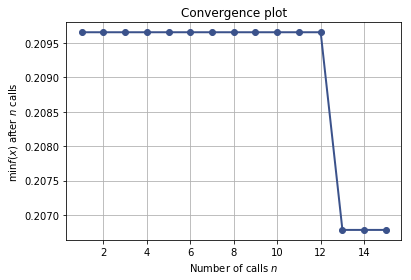

In [11]:
from neurowriter.optimizer import hypertrain

model, train_history = hypertrain(modelclass, inputtokens, encoder, corpus, n_calls=hypertrials)
model.save(modelname)

## Generation test

In [12]:
from neurowriter.writer import Writer

writer = Writer(model, encoder, creativity=0.1)
print(corpus[:inputtokens])
''.join(writer.write(seed=corpus[:inputtokens]))

AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AABBAABBAB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
ABABABA


'BBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB\nAAAAABBBBB

### Manual test generation test with 0 creativity

In [13]:
import numpy as np
seed = corpus[:inputtokens]
print("Seed:", seed)
print("Generated")
print(seed, end='')
for i in range(1000):
    seedcoded = encoder.encodetext(seed)
    #cls = model.predict_classes(np.array([seedcoded]), verbose=0)
    #char = encoder.index2char[cls[0]]
    cls = np.argmax(model.predict(np.array([seedcoded])))
    char = encoder.index2char[cls]
    print(char, end='')
    seed = seed[1:] + char

Seed: AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AABBAABBAB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
ABABABA
Generated
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AABBAABBAB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
ABABABABBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBBBB
AAAAABBB

## Possible improvements

* Try training with SGD and the full pecera corpus for a large number of iterations

From Facebook's convolutional translation paper
* Tokens are dealt with embeddings instead of one-hot encoder.
* The position of each token is also added as a parallel embedding
* Dropout for the embeddings and for the input of each convolutional block

## References

* WaveNet paper: https://arxiv.org/pdf/1609.03499.pdf
* A Keras implementation of WaveNet: https://github.com/usernaamee/keras-wavenet/blob/master/simple-generative-model.py
* Another one: https://github.com/basveeling/wavenet/blob/master/wavenet.py
* Facebook's convolutional translation paper: https://arxiv.org/pdf/1705.03122.pdf

## Scrapyard

def sampletext(logs):
    """Function that generates some sample text with the model.

    Intented to be used as a keras callback
    """
    writer = Writer(model, encoder, creativity=0.1)
    print(corpus[:inputtokens])
    print(''.join(writer.write(seed=corpus[:inputtokens])))

# Build model with input parameters
model = modelkind(inputtokens, encoder, *bestparams)
# Prepare callbacks
callbacks = [
    LambdaCallback(on_train_end=sampletext),
    ModelCheckpoint(filepath=modelname,save_best_only=True),
    EarlyStopping(patience=patience)
]
# Train model
model.fit_generator(
    traingenerator,
    steps_per_epoch=int((1-val)*(len(corpus)-inputtokens+1)/batchsize),
    validation_data=valgenerator,
    validation_steps=int(val*(len(corpus)-inputtokens+1)/batchsize),
    epochs=maxepochs,
    verbose=2,
    callbacks=callbacks
)